In [4]:
%pylab inline

class Generator:
    import scipy.interpolate as spi
    '''
    simulates a generator with utilities to input fuel use given an output load
    
    efficiency curve is a dictionary with the fuel use per hour in liters and the kW load as two lists or arrays
    
    '''
    def __init__(self, efficiency_curve):
        self.efficiency_curve = efficiency_curve
    
    def get_fuel_use(self):
        return self.efficiency_curve['fuel_use']
    
    def get_output_power(self):
        return self.efficiency_curve['output_power']
    
    def fuel_at_load(self, load):
        '''
        returns fuel use in liters per hour at a given load as interpolated from the curve
        TODO: check if load within range of curve
        '''
        fuel = self.spi.interp1d(self.efficiency_curve['output_power'],
                                 self.efficiency_curve['fuel_use'],
                                 bounds_error=False,
                                 fill_value=1000.)
        return fuel(load)
    
    def efficacy_at_load(self, load):
        '''
        returns the fuel use in liters per kWh of electricity delivered at a given load
        '''
        return self.fuel_at_load(load) / load

def plots(pap, ldc):

    # TODO: fix part of load curve that is out of data boundary
    # TODO: truncate load data at NAN or zero boundary
    
    plot(pap.get_output_power(), pap.get_fuel_use())
    title('Fuel Use')
    xlabel('Load (kW)')
    ylabel('Fuel Consumption (liters/hour)')
    show()
    
    plot(pap.get_output_power(), pap.efficacy_at_load(pap.get_output_power()))
    xlabel('Load (kW)')
    ylabel('Fuel efficacy (liters/kWh)')
    ylim((0.2, 0.5))
    show()
    
    plot(ldc)
    title('Load Duration Curve')
    xlabel('counts')
    ylabel('Power kW')
    show()
    
    plot(pap.efficacy_at_load(ldc))
    title('Price Duration Curve')
    show()

Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


# Coteaux Kohler Generator

- from data sheet in haiti folder
- coteaux kohler
- percent load, standby lph, prime lph
- 100%, 44.3, 40.6
- 75%, 35.1, 32.3
- 50%, 26.3, 24.0
- 25%, 16.2, 14.4
- no load consumption not given
- from report: rated active power 125kW
- Manufactured 1994. 


# Port-A-Piment FGWilson Generator

- portapiment FGWilson
- @50Hz percent load, standby lph, prime lph
- 110%, -, 54.3
- 100%, 45.3, 49.4
- 75%, 41.0, 37.4
- 50%, 28.0, 25.6
- from report: rated active power 199 kW
- Manufactured 2009.


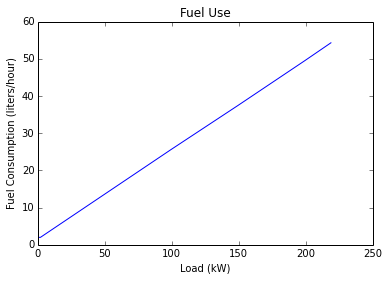

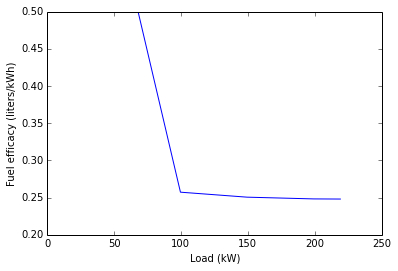

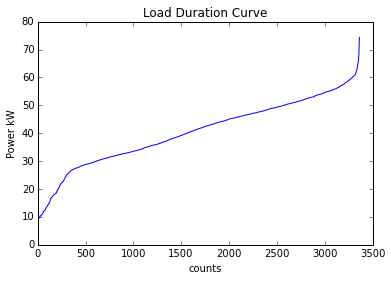

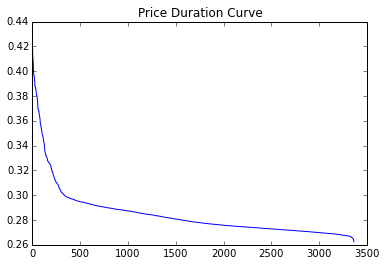

In [5]:
from scipy import interpolate
import scipy.interpolate as spi
power_kW = 199.
efficiency_curve = {'output_power': array([0.0, 0.01, 0.5, 0.75, 1.0, 1.1]) * power_kW,
                    'fuel_use' : array([2.0, 2.0, 25.6, 37.4, 49.4, 54.3])}

# create generator with characteristics from data sheet
pap = Generator(efficiency_curve)
power = loadtxt('Port a Piment/Full year time series/papim_power_tot.csv')
ldc = numpy.sort(power)
ldc = ldc[410900:]

plots(pap, ldc)

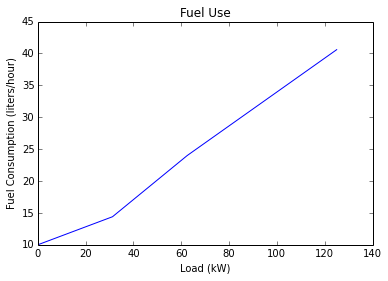

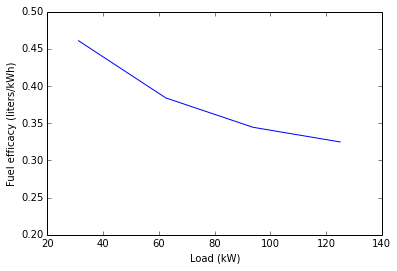

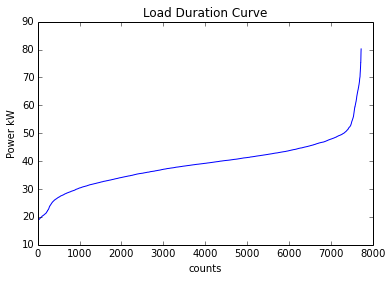

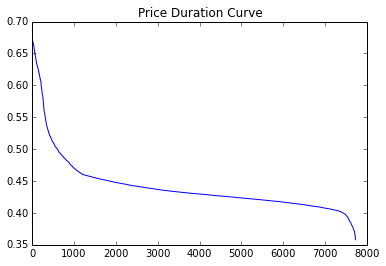

In [6]:
power_kW = 125.
efficiency_curve = {'output_power': array([0.0, 0.25, 0.5, 0.75, 1.0]) * power_kW,
                    'fuel_use' : array([10, 14.4, 24.0, 32.3, 40.6])}
coteaux = Generator(efficiency_curve)


power = loadtxt('Coteaux/Full year time series/coteaux_power_tot.csv')
ldc = numpy.sort(power)
ldc = ldc[339000:]

# TODO: fix part of load curve that is out of data boundary
# TODO: truncate load data at NAN or zero boundary

plots(coteaux, ldc)